In [281]:
from dotenv import load_dotenv
import numpy as np 
import requests 
import pandas as pd
from helpers import api_data_fetcher
import os
import importlib

importlib.reload(api_data_fetcher)

## Load environment variables from .env file
load_dotenv()

kiln_api_key = os.getenv("kiln_api_key")
kiln_host = os.getenv("kiln_host")



# Using the /Stakes Endpoint


In [270]:
# Fetch kiln validators from kiln /stakes API

stakes_base_url = f"{kiln_host}/v1/eth/stakes"

params = {
    "scope": "kiln",
    "page_size": 100
}

headers = {"Authorization": f"Bearer {kiln_api_key}"}
res = api_data_fetcher.fetch_all_pages(stakes_base_url, params, headers, "kiln_stakes.csv")


/Users/jamesgomatos/Desktop/Kiln-Project/helpers/api_data_fetcher.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.DataFrame(payload["data"])


Data fetched from https://api.testnet.kiln.fi/v1/eth/stakes and saved to kiln_stakes.csv


In [5]:

# Fetch non-kiln validators from kiln /stakes API
stakes_base_url = f"{kiln_host}/v1/eth/stakes"

params = {
    "scope": "network",
    "page_size": 100
}


headers = {"Authorization": f"Bearer {kiln_api_key}"}
non_kiln_validators = api_data_fetcher.fetch_all_non_kiln_validators(stakes_base_url, params, headers, "non-kiln-validators.csv", 10)
print(f"Loaded and sampled {len(non_kiln_validators)} non-Kiln validators from CSV")


/Users/jamesgomatos/Desktop/Kiln-Project/helpers/api_data_fetcher.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(payload["data"])])


Fetching page 2 of 10
Fetching page 3 of 10
Fetching page 4 of 10
Fetching page 5 of 10
Fetching page 6 of 10
Fetching page 7 of 10
Fetching page 8 of 10
Fetching page 9 of 10
Fetching page 10 of 10
Data fetched from https://api.testnet.kiln.fi/v1/eth/stakes and saved to non-kiln-validators.csv
Loaded and sampled 996 non-Kiln validators from CSV


 Find Suggested Non-Kiln Validators
 
This sections demonstrates how to use the `staking` APIs to find three groups of validators:
    - Random non-Kiln validators.
    - Non-Kiln validatars for a specific withdrawl_crendentials addrress of 0x195104dD1d3648141f42B85Fa4Fef6F9879825aa.
    - Kiln validators

The following steps are required to find the suggested non-Kiln validators:
    1. Call the /stakes endpoint with scope set to network as a parameter
    2. Call the /stakes endpoint using widthdrawl_crendentials=010000000000000000000000195104dD1d3648141f42B85Fa4Fef6F9879825aa as a parameter
    3. Call the /stakes endpoint setting scope to kiln as a parameter
    4. Store each result in a csv file 

In [282]:
# Fetch non-kiln validators from kiln /stakes API
stakes_base_url = f"{kiln_host}/v1/eth/stakes"

params = {
    "page_size": 100,
    "withdrawal_credentials": "010000000000000000000000195104dD1d3648141f42B85Fa4Fef6F9879825aa"
}


headers = {"Authorization": f"Bearer {kiln_api_key}"}
suggested_non_kiln_validators = api_data_fetcher.fetch_all_non_kiln_validators(stakes_base_url, params, headers, "suggested_non_kiln_validators.csv")
print(f"Loaded and sampled {len(suggested_non_kiln_validators)} non-Kiln validators from CSV")

1


/Users/jamesgomatos/Desktop/Kiln-Project/helpers/api_data_fetcher.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, page_df], ignore_index=True)


2
3
Data fetched from https://api.testnet.kiln.fi/v1/eth/stakes and saved to suggested_non_kiln_validators.csv
Loaded and sampled 300 non-Kiln validators from CSV


/Users/jamesgomatos/Desktop/Kiln-Project/helpers/api_data_fetcher.py:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, page_df], ignore_index=True)


Use pandas to read the the csv file and take a sample of 150 validators from each population group.

In [3]:
# load the validators csv file into a pandas dataframe
kiln_validators = pd.read_csv("kiln_stakes.csv")
kiln_validators = kiln_validators[kiln_validators["state"] == "active_ongoing"]
print(kiln_validators.shape)
# get sample of kiln validators 
sampled_kiln_validators= kiln_validators.sample(n=min(150, kiln_validators.shape[0]))
print(f"Loaded and sampled {len(sampled_kiln_validators)} Kiln validators from CSV")
print(sampled_kiln_validators.shape)

(6895, 28)
Loaded and sampled 150 Kiln validators from CSV
(150, 28)


In [284]:
# load the suggested non-validators csv file into a pandas dataframe
suggested_non_kiln_validators = pd.read_csv("suggested_non_kiln_validators.csv")
suggested_non_kiln_validators = suggested_non_kiln_validators[suggested_non_kiln_validators["state"] == "active_ongoing"]
print(suggested_non_kiln_validators.shape)
# get sample of kiln validators 
sampled_suggested_non_kiln_validators= suggested_non_kiln_validators.sample(n=min(150, suggested_non_kiln_validators.shape[0]))
print(f"Loaded and sampled {len(sampled_suggested_non_kiln_validators)} Kiln validators from CSV")
print(sampled_suggested_non_kiln_validators.shape)

(299, 27)
Loaded and sampled 150 Kiln validators from CSV
(150, 27)


In [6]:
# load sample of non-kiln validators 
non_kiln_validators = pd.read_csv('non-kiln-validators.csv')
non_kiln_validators = non_kiln_validators[non_kiln_validators["state"] == "active_ongoing"]
print(non_kiln_validators.shape)
sampled_non_kiln_validators = non_kiln_validators.sample(n=min(150, non_kiln_validators.shape[0]))
print(f"Loaded and sampled {len(sampled_non_kiln_validators)} non-Kiln validators from CSV") 
print(sampled_non_kiln_validators.shape)

(936, 27)
Loaded and sampled 150 non-Kiln validators from CSV
(150, 27)


 the following code simply calls the /stakes endpoint to find the three groups of Kiln validators:

In [285]:
kiln_validators_with_apy = api_data_fetcher.calculate_apys(sampled_kiln_validators)
suggested_non_kiln_validators_with_apy = api_data_fetcher.calculate_apys(sampled_suggested_non_kiln_validators)
non_kiln_validators_with_apy = api_data_fetcher.calculate_apys(sampled_non_kiln_validators)



# Calculate Summary Statistics 
Use pandas to calculate the summary statistics for each population group. 
    - Mean
    - Median
    - Standard Deviation
    - Minimum
    - Maximum
    - 25th percentile
    - 75th percentile
    - 90th percentile
    - 95th percentile
    - 99th percentile
    - 100th percentile

In [292]:
non_kiln_results =  api_data_fetcher.calculate_overall_apys(non_kiln_validators_with_apy)
suggested_non_kiln_results= api_data_fetcher.calculate_overall_apys(suggested_non_kiln_validators_with_apy)
kiln_results =  api_data_fetcher.calculate_overall_apys(kiln_validators_with_apy)

for key in [kiln_results, suggested_non_kiln_results, non_kiln_results]:
    # Print results
    if key == kiln_results:
        print("Kiln Validators:")
    elif key == suggested_non_kiln_results:
        print("Suggested Non-Kiln Validators:")
    else:
        print("Non-Kiln Validators:")
    print(f"Average gross APY: {key['avg_gross_apy']:.4f}%")
    print(f"Average CL APY: {key['avg_cl_apy']:.4f}%")
    print(f"Average EL APY: {key['avg_el_apy']:.4f}%")

 # Additional analysis
print("\nAdditional Statistics:")
print("Kiln Validators:")
print(kiln_validators_with_apy[['gross_apy', 'cl_apy', 'el_apy']].describe())
print("Suggest Non-Kiln Validators:")
print(suggested_non_kiln_validators_with_apy[['gross_apy', 'cl_apy', 'el_apy']].describe())
print("\nNon-Kiln Validators:")
print(non_kiln_validators_with_apy[['gross_apy', 'cl_apy', 'el_apy']].describe())


Kiln Validators:
Average gross APY: 1.9526%
Average CL APY: 1.9038%
Average EL APY: 0.0488%
Suggested Non-Kiln Validators:
Average gross APY: 1.7315%
Average CL APY: 1.6868%
Average EL APY: 0.0448%
Non-Kiln Validators:
Average gross APY: 1.6340%
Average CL APY: 1.6069%
Average EL APY: 0.0270%

Additional Statistics:
Kiln Validators:
        gross_apy      cl_apy      el_apy
count  150.000000  150.000000  150.000000
mean     1.952598    1.903841    0.048757
std      0.609705    0.550957    0.099313
min      1.499291    1.499291    0.000000
25%      1.570839    1.570839    0.000000
50%      1.577442    1.577442    0.000000
75%      2.199299    2.133953    0.051667
max      4.587531    4.266273    0.404508
Suggest Non-Kiln Validators:
        gross_apy      cl_apy      el_apy
count  150.000000  150.000000  150.000000
mean     1.731527    1.686769    0.044758
std      0.455215    0.404532    0.090302
min      0.314717    0.289802    0.000000
25%      1.415136    1.415136    0.000000
50%   

# Comparison of Values

# Average_APY

Gross APY: Kiln validators have the highest average gross APY (1.9526%), followed by suggested non-Kiln validators (1.7315%) and then non-Kiln validators (1.6340%).

CL APY: Kiln validators also lead with an average CL APY of 1.9038%, suggesting they are more efficient in earning staking rewards.

EL APY: Although Kiln has the highest average EL APY (0.0488%)

# Variability

Kiln Validators have a lower standard deviation in gross APY (0.6097%) compared to non-Kiln validators (0.9089%), indicating more consistent performance.

The suggested non-Kiln validators show even lower variability (0.4552%), which proposes an optimized subset of non-Kiln validators with more stable performance.

EL APY Variability: Non-Kiln validators show higher variability in EL APY (Std Dev: 0.1007%) versus Kiln (0.0993%) and suggested non-Kiln validators (0.0903%).

# Consensus Layer APY (CL_APY)

 Kiln validators range from 1.4993% to 4.2663%, while non-Kiln validators range much wider, from -1.4496% to 7.1786%. This wider range for non-Kiln validators suggests more variability and potentially some poor-performing validators who might even lose ETH due to penalities.

# Execution Layer APY (EL_APY)

Kiln Validators have higher EL APY (Mean: 0.0488%, Std: 0.0993%) compared to non-Kiln validators (Mean: 0.0270%, Std: 0.1007%).

Though the differences in means are smaller, the higher EL APY for Kiln validators could be a result of better strategies to capture transaction fees and other execution layer rewards. 

non-Kiln validators reach a max EL_APY of 1.1666%. This shows that while Kiln validators are slightly more consistent, individual non-Kiln validators can occasionally capture very high rewards.

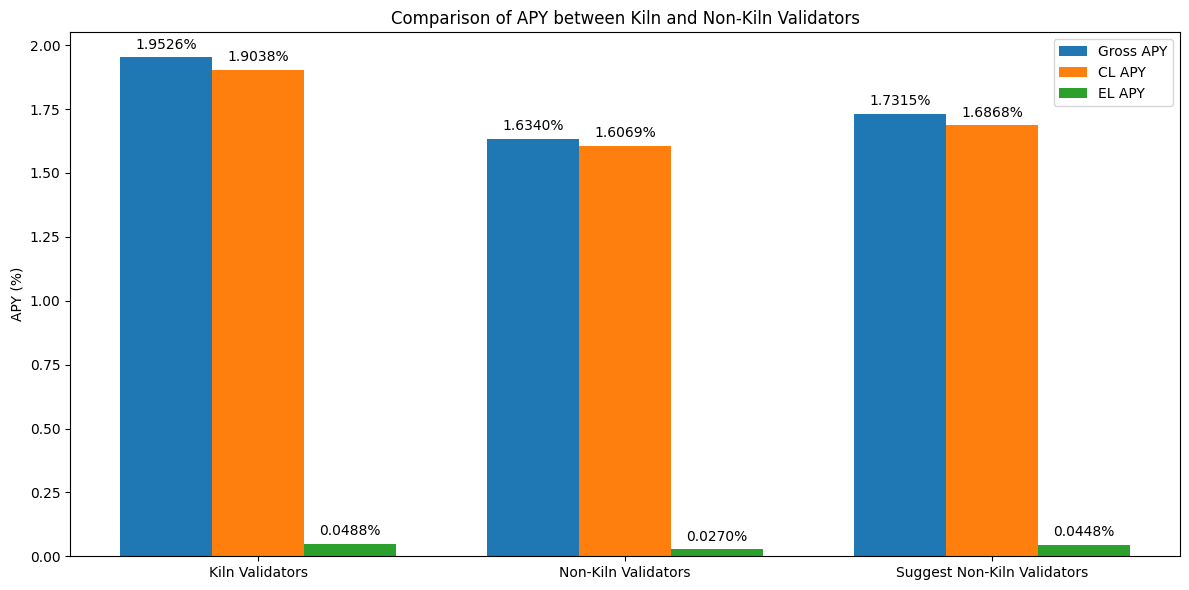

In [299]:
import matplotlib.pyplot as plt
import numpy as np

# Data
validator_types = ['Kiln Validators',  'Non-Kiln Validators', 'Suggest Non-Kiln Validators']
gross_apy = [kiln_results['avg_gross_apy'], non_kiln_results['avg_gross_apy'], suggested_non_kiln_results['avg_gross_apy']]
cl_apy = [kiln_results['avg_cl_apy'], non_kiln_results['avg_cl_apy'], suggested_non_kiln_results['avg_cl_apy']]
el_apy = [kiln_results['avg_el_apy'], non_kiln_results['avg_el_apy'],   suggested_non_kiln_results['avg_el_apy']]

# Set up the bar chart
x = np.arange(len(validator_types))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bars1 = ax.bar(x - width, gross_apy, width, label='Gross APY', color='#1f77b4')
bars2 = ax.bar(x, cl_apy, width, label='CL APY', color='#ff7f0e')
bars3 = ax.bar(x + width, el_apy, width, label='EL APY', color='#2ca02c')
# Customize the chart
ax.set_ylabel('APY (%)')
ax.set_title('Comparison of APY between Kiln and Non-Kiln Validators')
ax.set_xticks(x)
ax.set_xticklabels(validator_types)
ax.legend()

# Add value labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 4),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
# Adjust layout and display
plt.tight_layout()
plt.show()

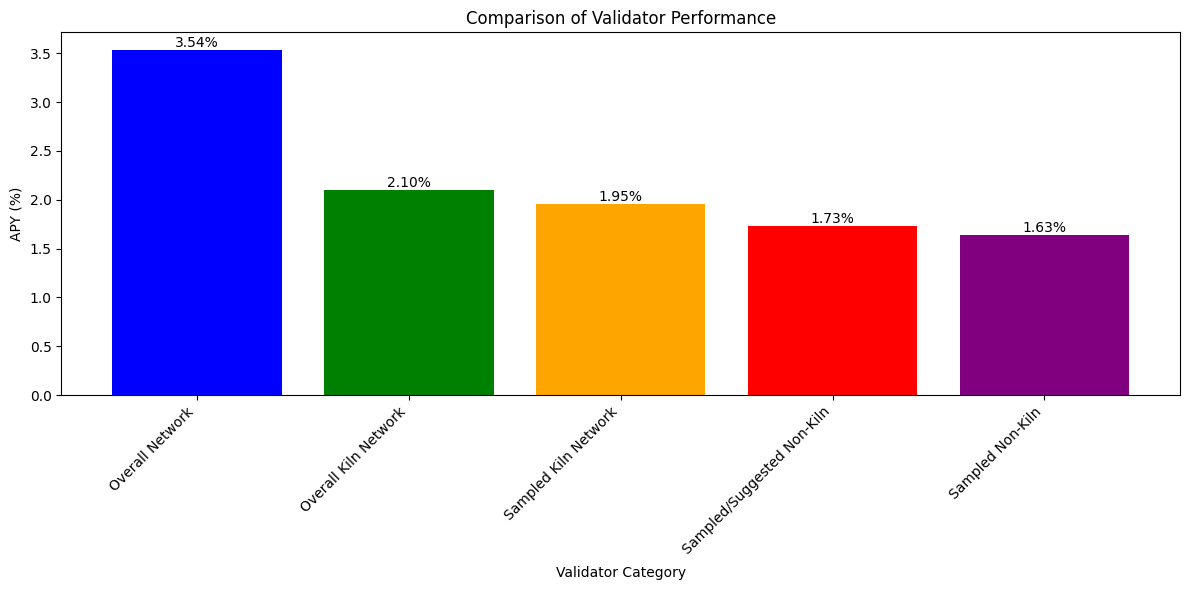


Analysis:
1. The overall network APY is 3.54%
2. The Kiln 30d network APY is 2.10%
3. Kiln underforms the overall network by -1.44 percentage points
4. The Suggested Non-Kiln validators underperform the Kiln network by -0.37 percentage points
5. The network outperforms the random non-Kiln validators by 1.90 percentage points
6. How the random kiln validators perform agaisnt all kiln validators  0.15 percentage points


In [332]:
network_stats_url = kiln_host + "/v1/eth/network-stats"
kiln_stats_url = kiln_host + "/v1/eth/kiln-stats"

# Headers for API requests
headers = {
    "Authorization": f"Bearer {kiln_api_key}",
    "Content-Type": "application/json"
}

def fetch_data(url):
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()['data']
    else:
        print(f"Error fetching data from {url}: {response.status_code}")
        return None

# Fetch data
network_stats = fetch_data(network_stats_url)
kiln_stats = fetch_data(kiln_stats_url)

# Extract relevant data
if network_stats and kiln_stats:
    kiln_stats_df= pd.DataFrame()
    kiln_apy = kiln_stats['gross_apy']
    kiln_stats_df["gross_apy"] = kiln_apy
    network_apy = network_stats['network_gross_apy']
    kiln_apy_last_1d = kiln_apy['last_1d']
    kiln_apy_last_7d = kiln_apy['last_7d']
    kiln_apy_last_30d = kiln_apy['last_30d']
    # Create a DataFrame for comparison
    data = {
        'Category': ['Overall Network', 'Overall Kiln Network', 'Sampled Kiln Network', ' Sampled/Suggested Non-Kiln','Sampled Non-Kiln'],
        'APY': [network_apy, kiln_apy_last_30d, kiln_results['avg_gross_apy'], suggested_non_kiln_results['avg_gross_apy'], non_kiln_results["avg_gross_apy"]]
    }
    df = pd.DataFrame(data)

    # Calculate differences
    df['Difference from Network'] = df['APY'] - network_apy
    df['Difference from Kiln'] = df['APY'] - kiln_apy_last_30d

    # Display results

    # Visualization
    plt.figure(figsize=(12, 6))
    bars = plt.bar(df['Category'], df['APY'], color=['blue', 'green', 'orange', 'red', 'purple'])
    plt.title('Comparison of Validator Performance')
    plt.xlabel('Validator Category')
    plt.ylabel('APY (%)')
    plt.xticks(rotation=45, ha='right')

    # Add value labels on the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Analysis
    print("\nAnalysis:")
    print(f"1. The overall network APY is {network_apy:.2f}%")
    print(f"2. The Kiln 30d network APY is {kiln_apy_last_30d:.2f}%")
    print(f"3. Kiln underforms the overall network by {kiln_apy_last_30d - network_apy:.2f} percentage points")
    print(f"4. The Suggested Non-Kiln validators underperform the Kiln network by {suggested_non_kiln_results['avg_gross_apy'] - kiln_apy_last_30d:.2f} percentage points")
    print(f"5. The network outperforms the random non-Kiln validators by {network_apy - non_kiln_results['avg_gross_apy']:.2f} percentage points")
    print(f"6. How the random kiln validators perform agaisnt all kiln validators  {kiln_apy_last_30d - kiln_results['avg_gross_apy']:.2f} percentage points")

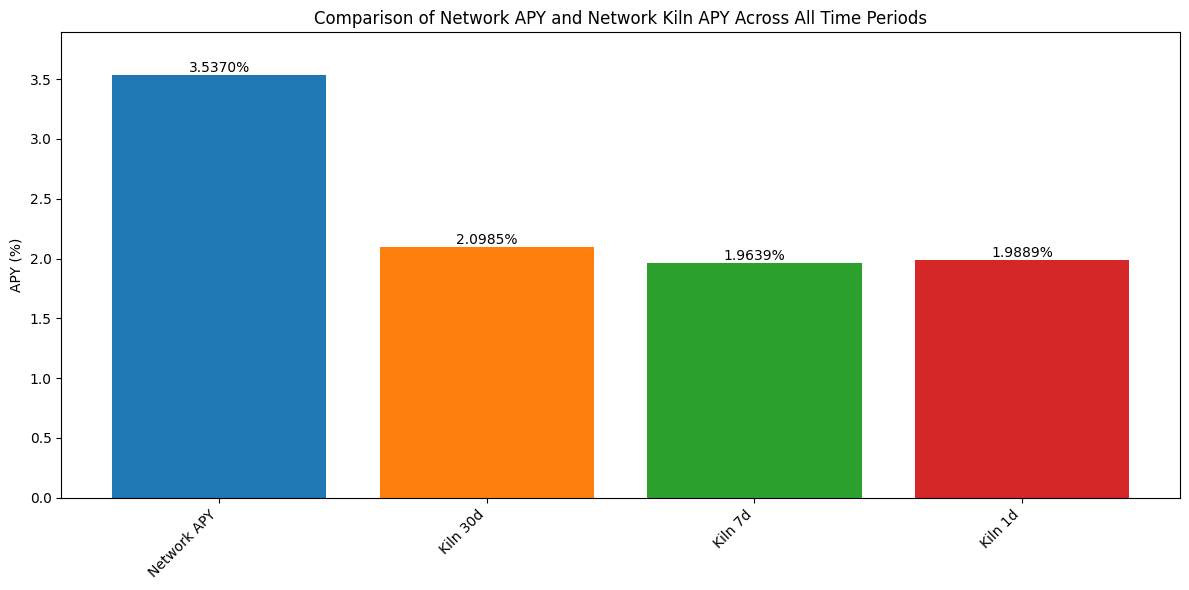

In [329]:

# Create a  graph to compare all APYs
plt.figure(figsize=(12, 6))

all_labels = ['Network APY', 'Kiln 30d', 'Kiln 7d', 'Kiln 1d']
all_values = [network_apy, kiln_apy_last_30d, kiln_apy_last_7d, kiln_apy_last_1d]

bars = plt.bar(all_labels, all_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Comparison of Network APY and Network Kiln APY Across All Time Periods')
plt.ylabel('APY (%)')
plt.ylim(0, max(all_values) * 1.1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}%',
             ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Given the comparative differences, we see that the overall network APY is significantly higher compared to both the overall Kiln network and sampled validators. This could be due to a variety of reasons including:
- the presence of high-performing validators not included in the sample
- The small sample size we've used thus far in this analysis 
- Short-term spikes in network activity, such as high transaction volume due to new DeFi projects, NFTs, or other on-chain activities, can temporarily increase APY. 
- Review of recent APY figures shows that the network APY has been trending downwards, which could be due to a variety of factors including increased competition, lower transaction fees, or other factors.

# Let's now visualize the data to better understand the distribution of when our validaors were activated.

The code snipped below:

    - Uses the /stakes endpoint to get the stake activation dates for the validators in our sample.
    - plots the distribution of stake activation dates from a DataFrame.
    - prints summary statistics related to these activation dates.


Why is could this information be useful?

Temporal Representation:

Inclusivity: Ensuring that the dataset includes validators created at various times is essential for representativeness. If most validators in the dataset were activated recently, it may not accurately represent long-term performance and stability.
Balance: A balanced distribution of activation dates ensures that the dataset captures varying market conditions, different phases of network updates, and changes in staking dynamics over time.

Identifying Staking Trends:

Temporal Patterns: By analyzing the activation dates of stakes, stakeholders can identify temporal patterns or trends, such as increased staking activity around major network upgrades, events, or announcements.
Market Sentiment: Spikes in staking activity can indicate positive market sentiment or increasing confidence in the network.


Performance: Validators activated during different periods may have different performance characteristics. For example, validators activated during a bull market may have higher rewards due to increased network activity, while validators activated during a bear market may have lower rewards.


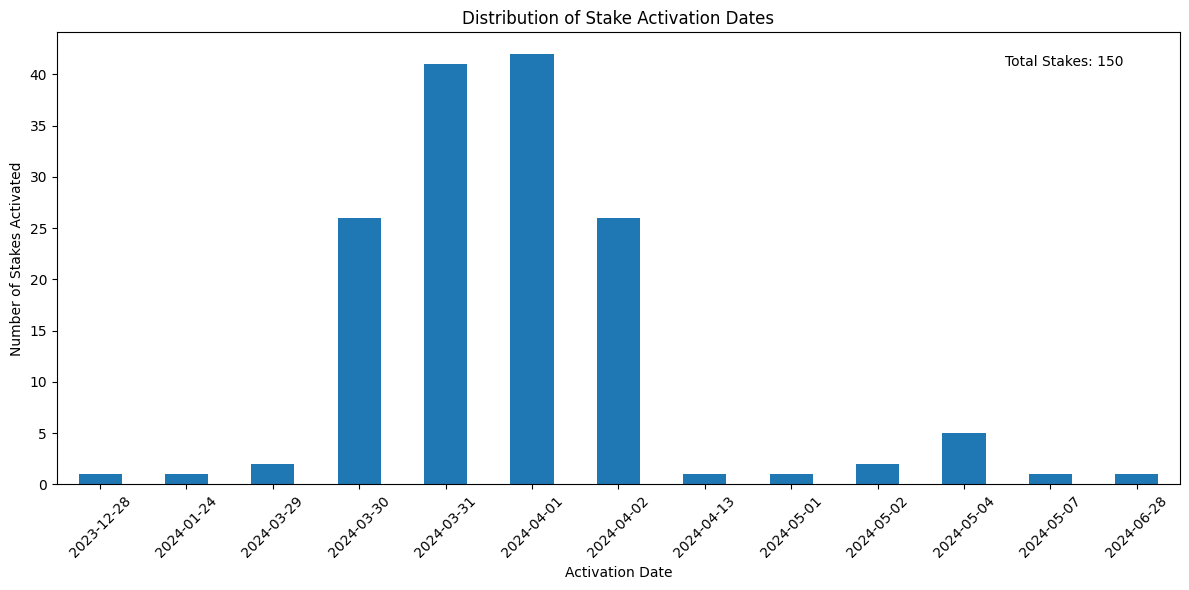

Total number of stakes: 150
Date range: 2023-12-28 to 2024-06-28
Date with most activations: 2024-04-01 (42 activations)


In [20]:
from datetime import datetime

def plot_stake_activations(df):
    # Convert activated_at to datetime
    df = df.copy()
    df['activated_at'] = pd.to_datetime(df['activated_at'])

    # Group by activation date and count
    activation_counts = df.groupby(df['activated_at'].dt.date).size().sort_index()

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    activation_counts.plot(kind='bar')
    plt.title('Distribution of Stake Activation Dates')
    plt.xlabel('Activation Date')
    plt.ylabel('Number of Stakes Activated')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add total count to the plot
    total_stakes = len(df)
    plt.text(0.95, 0.95, f'Total Stakes: {total_stakes}', 
             transform=plt.gca().transAxes, ha='right', va='top')

    # Show the plot
    plt.show()

    # Print some summary statistics
    print(f"Total number of stakes: {total_stakes}")
    print(f"Date range: {activation_counts.index.min()} to {activation_counts.index.max()}")
    print(f"Date with most activations: {activation_counts.idxmax()} ({activation_counts.max()} activations)")

plot_stake_activations(sampled_kiln_validators)

Description:

Dates: Stakes activated over a period from 2024-03-28 to 2024-04-07, with notable clusters around the start of April.
Stakes Activated:
Peak activations on 2024-03-31 and 2024-04-01 with approximately 40 stakes each.
Other dates show gradual activation counts.
Total Stakes: 150.
Interpretation:

Near-Term Volatility: This distribution indicates a period of rapid activation around the end of March and the beginning of April.
Potential Reasons:
Response to recent market conditions, possibly a surge in ETH price or significant network events.
Validators might have been delayed or timed their activations to take advantage of specific network conditions.
Possibly due to validator cycles or infrastructure readiness during these dates.

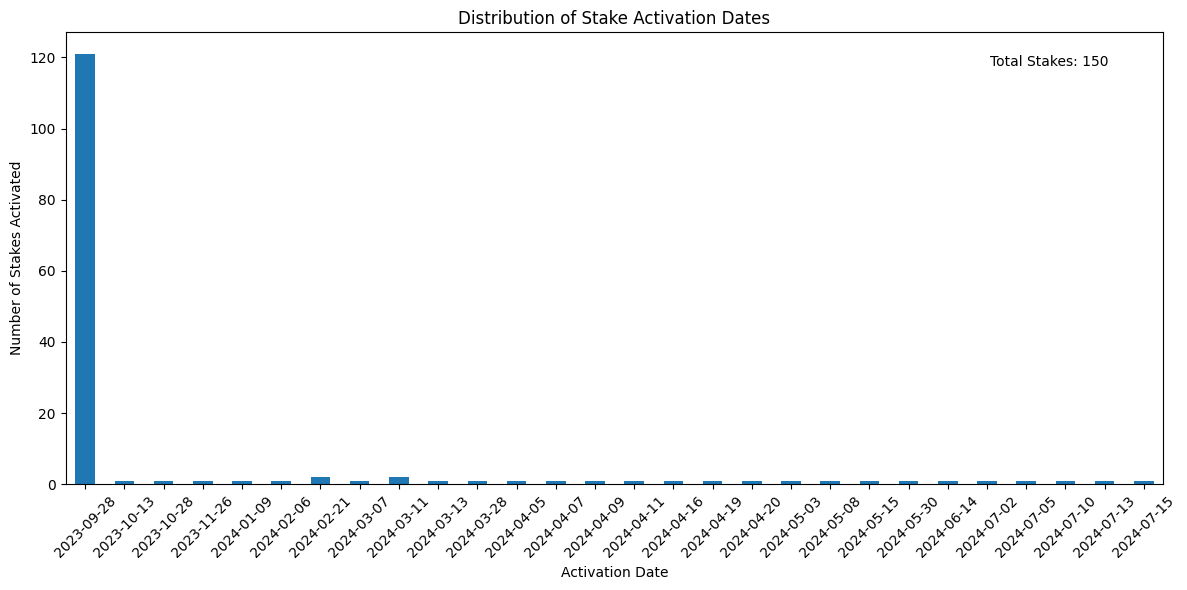

Total number of stakes: 150
Date range: 2023-09-28 to 2024-07-15
Date with most activations: 2023-09-28 (121 activations)


In [21]:
plot_stake_activations((sampled_non_kiln_validators))

Description:

Dates: A significant spike on 2023-08-10 with a long tail stretching into mid-September.
Stakes Activated:
2023-08-10: Approximately 120 stakes.
Subsequent dates: Fewer than 5 stakes each.
Total Stakes: 150.
Interpretation:

Single Mass Activation: This graph indicates one dominant day where the vast majority of stakes were activated.
Potential Reasons:
A major event or deadline on 2023-08-10 prompting bulk staking (e.g., launch of a new staking program, end of a lock-up period).
Institutional or large-scale stakeholder initiative resulting in mass staking.

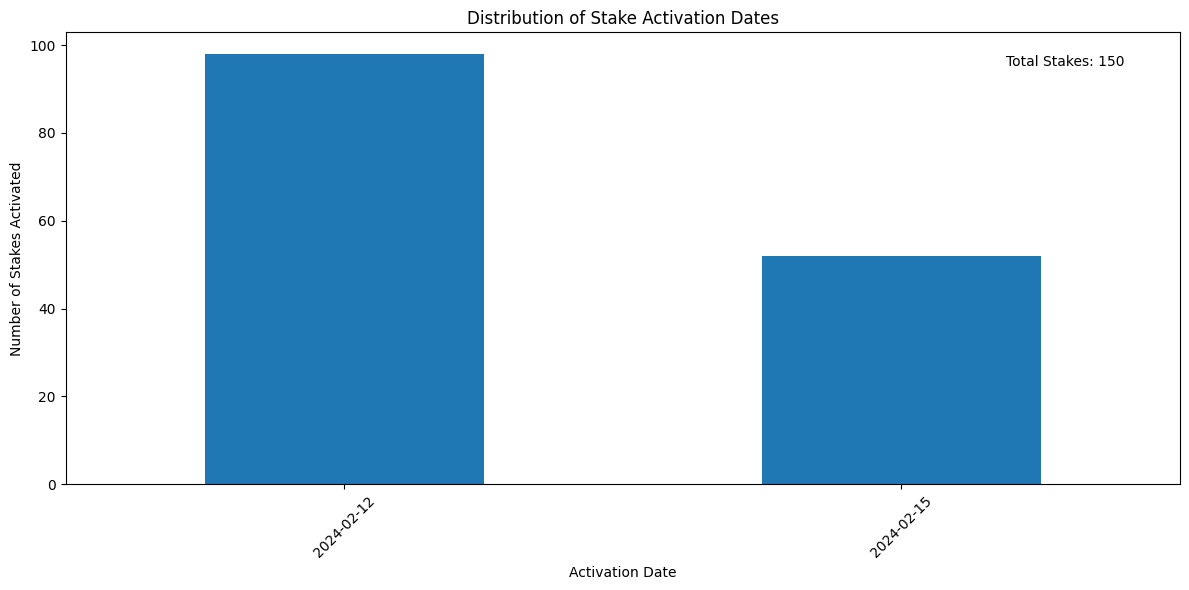

Total number of stakes: 150
Date range: 2024-02-12 to 2024-02-15
Date with most activations: 2024-02-12 (98 activations)


In [331]:
plot_stake_activations(suggested_non_kiln_validators_with_apy)

Description:

Dates: This graph shows two significant clusters of stakes activated on two distinct dates — one large spike on 2024-02-12 and a smaller spike on 2024-02-15.
Stakes Activated:
2024-02-12: Approximately 100 stakes.
2024-02-15: Approximately 50 stakes.
Total Stakes: 150.
Interpretation:

Batch Activations: The spikes indicate that stakes were activated in large batches on specific dates. This pattern could suggest coordinated actions, such as a large staking event or an orchestrated validator launch.
Potential Reasons:
Major network update or protocol upgrade that incentivized staking.
Campaigns or promotions led to bulk activations.
Operational convenience where multiple validators were set up simultaneously.

# Conclusion on the temporal distribution of validator activations:

These graphs reveal that stake activation is often highly clustered on specific dates, likely due to significant network events, market conditions, or coordinated actions from large stakeholders. This analysis helps illustrate how and when stakes are activated, providing valuable insights into network dynamics and stakeholder behaviors.

Understanding these patterns is crucial for all market participants as it informs better resource management, strategic planning, and risk mitigation in the staking ecosystem.

# Using the /Rewards Endpoint

The below code is used to gather historical reward data for analysis, such as calculating APY
(Annual Percentage Yield), comparing validator performance, and understanding rewards distribution across different validator groups. This is particularly useful for those who are interested in the performance trends and financial returns of their validators over a specified period.

In [337]:
from datetime import datetime, timedelta
sampled_kiln_validators['validator_index'] = sampled_kiln_validators['validator_index'].astype(int)
print(sampled_kiln_validators.shape)
print(sampled_non_kiln_validators.shape)
non_kiln_validator_index_list = sampled_non_kiln_validators['validator_index'].to_list()
kiln_validator_index_list = sampled_kiln_validators['validator_index'].to_list()
suggested_non_kiln_validator_index_list = sampled_suggested_non_kiln_validators['validator_index'].to_list()

rewards_url = kiln_host + "/v1/eth/rewards"
# Headers for API requests
headers = {
    "Authorization": f"Bearer {kiln_api_key}",
    "Content-Type": "application/json"
}

def fetch_rewards_data(url, start_date, headers, validator_indexes):
    result_string = ','.join(str(x) for x in validator_indexes)
    url = url+f"?validator_indexes={result_string}&start_date={start_date}"
    print(url)
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data from {url}: {response.status_code}")
        return None
    
start_date =  (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

# Fetch data
non_kiln_validator_rewards = fetch_rewards_data(rewards_url, start_date, headers, non_kiln_validator_index_list)

(150, 28)
(150, 27)
[1594942, 1594899, 1595805, 1595802, 1596333, 1596336, 1594941, 1596297, 1596331, 1594940, 1595823, 1594852, 1595811, 1596314, 1596357, 1594890, 1594945, 1594936, 1595775, 1594902, 1594924, 1594878, 1594854, 1596340, 1595795, 1594849, 1596322, 1595752, 1594947, 1596283, 1594873, 1596347, 1594898, 1595754, 1596337, 1595768, 1594893, 1594919, 1596311, 1594858, 1596334, 1595803, 1595741, 1594948, 1596307, 1596351, 1594909, 1595763, 1594934, 1596349, 1595820, 1595759, 1595799, 1596281, 1594921, 1594882, 1595794, 1594928, 1596315, 1594851, 1595782, 1596260, 1595788, 1595771, 1596327, 1594887, 1596323, 1595770, 1595787, 1595804, 1596330, 1596308, 1595813, 1594848, 1595810, 1595751, 1594911, 1596356, 1596268, 1594894, 1596262, 1596285, 1596310, 1595785, 1595789, 1596341, 1594845, 1596265, 1596266, 1594913, 1594857, 1595816, 1596343, 1594900, 1594939, 1595755, 1595832, 1594863, 1594932, 1594868, 1594861, 1596350, 1596332, 1595792, 1594874, 1596338, 1596273, 1596319, 1594938

The function plot_weekly_mean_apy takes a payload containing rewards data and plots the monthly mean values of APY (Annual Percentage Yield) metrics—gross_apy, cl_apy, and el_apy. Additionally, it prints summary statistics of these metrics.

/var/folders/6d/6mt4rsws05l1flxghb9vdlgw0000gn/T/ipykernel_2193/2037708771.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean().round(6)


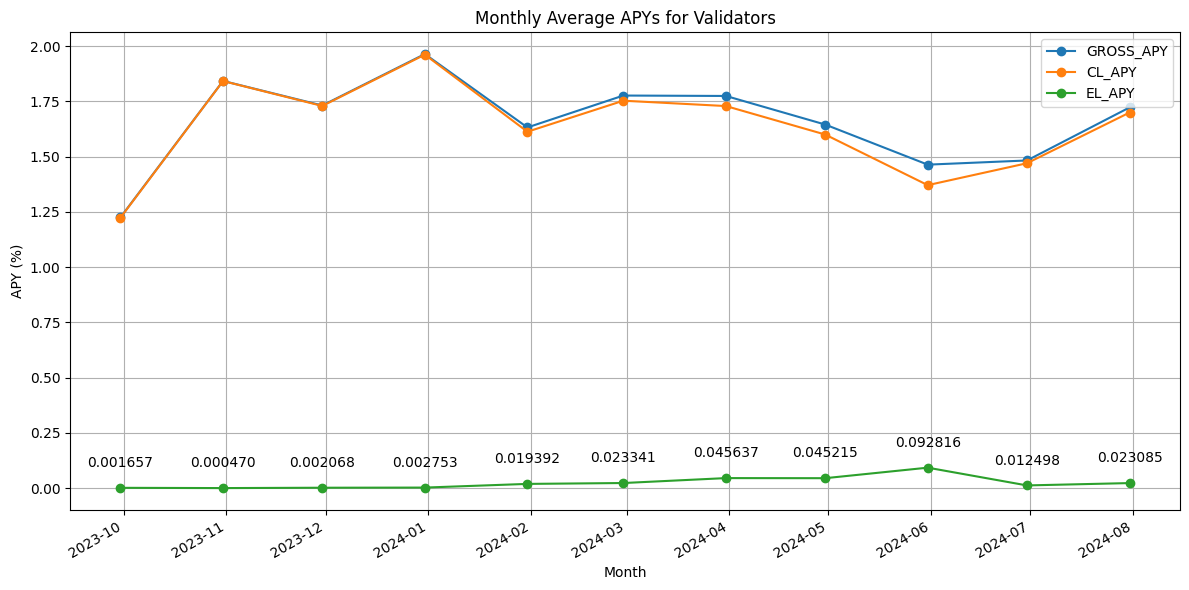

       gross_apy     cl_apy     el_apy
count  11.000000  11.000000  11.000000
mean    1.659907   1.635459   0.024448
std     0.205258   0.212820   0.027914
min     1.225233   1.223576   0.000470
25%     1.557226   1.534948   0.002410
50%     1.722420   1.699336   0.019392
75%     1.775308   1.741016   0.034278
max     1.964024   1.961270   0.092816


In [371]:

def plot_weekly_mean_apy(rewards_payload):

    data_list = rewards_payload['data']
    data_list = data_list
    df = pd.DataFrame(data_list, columns=['date', 'gross_apy', 'cl_apy', 'el_apy'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    """
    This function takes in a dataframe with rewards data and plots the weekly mean values of APY metrics.

    Parameters:
    df (pd.DataFrame): DataFrame containing the rewards data with 'date' column in datetime format.
    """
    monthly_avg = df.resample('M').mean().round(6)
    # Plot the aggregated data
    plt.figure(figsize=(12, 6))
 

    # Plot data with formatted labels
    for column in ['gross_apy', 'cl_apy', 'el_apy']:
        plt.plot(monthly_avg.index, monthly_avg[column], label=f'{column.upper()}', marker='o')


     # Add value labels to each point
    for x, y in zip(monthly_avg.index, monthly_avg[column]):
        plt.annotate(f'{y:.6f}', (x, y), textcoords="offset points", xytext=(0,15), ha='center')


    plt.title('Monthly Average APYs for Validators')
    plt.xlabel('Month')
    plt.ylabel('APY (%)')
    plt.legend()
    plt.grid(True)

    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()

    # Use a tight layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Print summary statistics with 6 decimal places
    print(monthly_avg.describe().round(6))
plot_weekly_mean_apy(non_kiln_validator_rewards)

The visual trends on the graph line up well with the summary statistics. GROSS_APY and CL_APY are stable and closely correlated, while EL_APY remains significantly lower with relatively higher variability.

CL_APY spikes between April and June 2024 could be attributed to a combination of network upgrades, increased transaction volume, staking rewards adjustments, validator performance, market conditions, and possibly one-time events or anomalies. These factors can independently or collectively contribute to temporary increases in the yield for validators at the client layer. To pinpoint the exact reason, one would need to look at specific events or changes in the network occurring during that period.

https://api.testnet.kiln.fi/v1/eth/rewards?validator_indexes=1637201,1634460,1635359,1638719,1633102,1637890,1638571,1634672,1696533,1635433,1634451,1636082,1638188,1635051,1633754,1635517,1635381,1637829,1639032,1638986,1639232,1696445,1633880,1562935,1638616,1635099,1634573,1632041,1634504,1636579,1635347,1634237,1636210,1692644,1636446,1639048,1638089,1548579,1638410,1639124,1636068,1691734,1638884,1636684,1634356,1638536,1635219,1636517,1637153,1637741,1637622,1637824,1634869,1696407,1639097,1633237,1635463,1635763,1692635,1637280,1633704,1635819,1631797,1635447,1638051,1637840,1636578,1637646,1634668,1639281,1636202,1638841,1637726,1637066,1638417,1636593,1633802,1635844,1702082,1634810,1636532,1636417,1637010,1634731,1636137,1636683,1639329,1637779,1633951,1633784,1635159,1637931,1637648,1638187,1636494,1636242,1633706,1639067,1635274,1636551,1636048,1635350,1636469,1634342,1634542,1638462,1635040,1638329,1636910,1637108,1637190,1637925,1637842,1638481,1634054,1638715,1636027,163

/var/folders/6d/6mt4rsws05l1flxghb9vdlgw0000gn/T/ipykernel_2193/3469462207.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean().round(6)


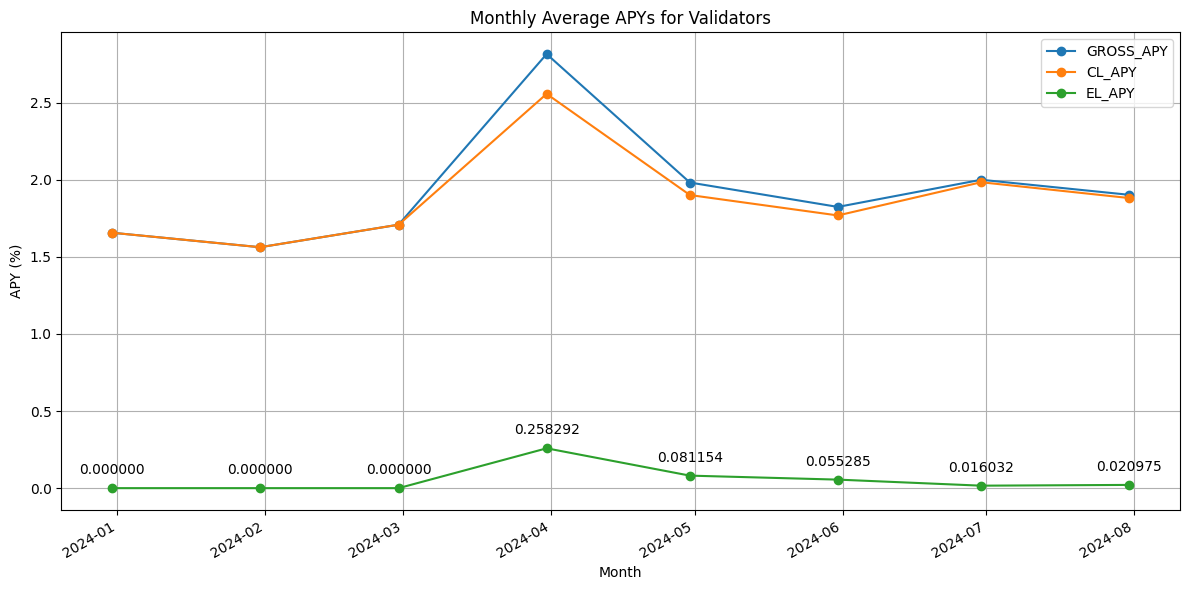

       gross_apy    cl_apy    el_apy
count   8.000000  8.000000  8.000000
mean    1.931391  1.877424  0.053967
std     0.389580  0.307573  0.087631
min     1.562466  1.562466  0.000000
25%     1.695572  1.695572  0.000000
50%     1.863119  1.824988  0.018504
75%     1.986546  1.921673  0.061752
max     2.815351  2.557059  0.258292


In [230]:
kiln_validator_rewards = fetch_rewards_data(rewards_url, start_date, headers, kiln_validator_index_list)
plot_weekly_mean_apy(kiln_validator_rewards)

The graph demonstrates that while GROSS_APY and CL_APY are generally stable, a significant spike occurs in April 2024. EL_APY, which is usually quite low, also peaks during this month but remains marginal before and after this period. This suggests a particular event or a set of factors that led to unusually high rewards for validators in April 2024

https://api.testnet.kiln.fi/v1/eth/rewards?validator_indexes=1594942,1594899,1595805,1595802,1596333,1596336,1594941,1596297,1596331,1594940,1595823,1594852,1595811,1596314,1596357,1594890,1594945,1594936,1595775,1594902,1594924,1594878,1594854,1596340,1595795,1594849,1596322,1595752,1594947,1596283,1594873,1596347,1594898,1595754,1596337,1595768,1594893,1594919,1596311,1594858,1596334,1595803,1595741,1594948,1596307,1596351,1594909,1595763,1594934,1596349,1595820,1595759,1595799,1596281,1594921,1594882,1595794,1594928,1596315,1594851,1595782,1596260,1595788,1595771,1596327,1594887,1596323,1595770,1595787,1595804,1596330,1596308,1595813,1594848,1595810,1595751,1594911,1596356,1596268,1594894,1596262,1596285,1596310,1595785,1595789,1596341,1594845,1596265,1596266,1594913,1594857,1595816,1596343,1594900,1594939,1595755,1595832,1594863,1594932,1594868,1594861,1596350,1596332,1595792,1594874,1596338,1596273,1596319,1594938,1594886,1596292,1595825,1595740,1595742,1596352,1594935,1596271,159

/var/folders/6d/6mt4rsws05l1flxghb9vdlgw0000gn/T/ipykernel_2193/2037708771.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean().round(6)


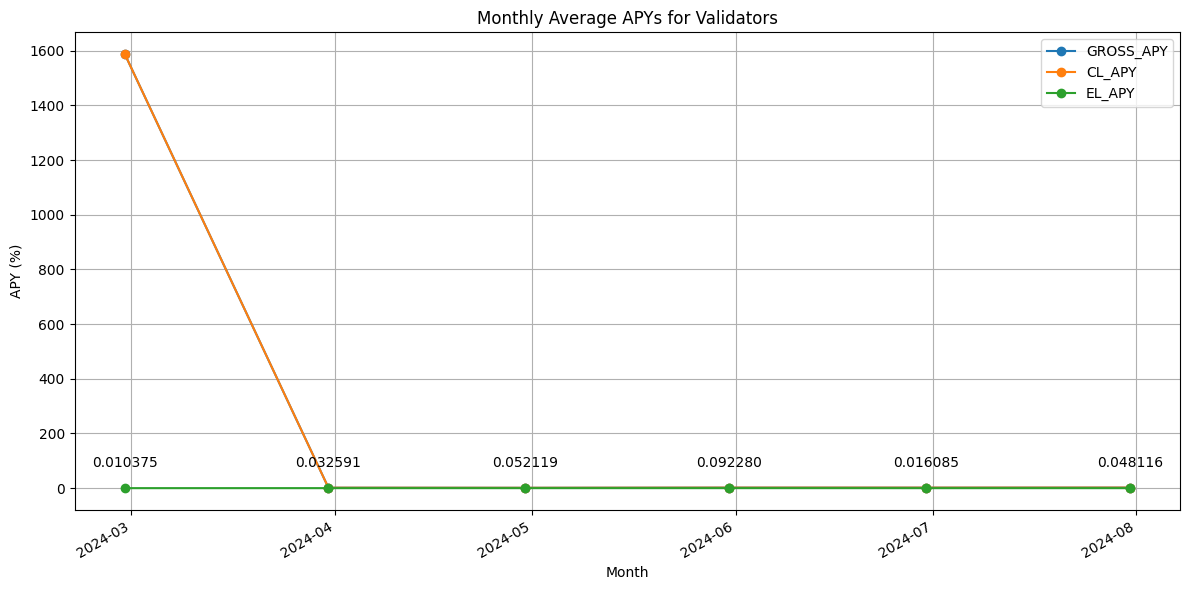

         gross_apy       cl_apy    el_apy
count     6.000000     6.000000  6.000000
mean    266.165277   266.123349  0.041928
std     647.605376   647.620832  0.029759
min       1.334066     1.281947  0.010375
25%       1.708405     1.679940  0.020212
50%       1.918995     1.864812  0.040354
75%       2.052718     1.993560  0.051118
max    1588.084105  1588.073730  0.092280


In [372]:
from datetime import date
start_date = date(2023, 1, 1).strftime('%Y-%m-%d')
suggested_non_kiln_validator_rewards = fetch_rewards_data(rewards_url, start_date, headers, suggested_non_kiln_validator_index_list)
plot_weekly_mean_apy(suggested_non_kiln_validator_rewards)

Possible Causes for CL APY Spike:
Anomalous Network Event:
Could point to a rare event such as a major bug exploit, significant network congestion, or an opportunistic MEV (Maximal Extractable Value) event.
Incorrect Data Reporting:
Potential data reporting or logging error yielding an abnormally high value for one month.
Protocol-specific Reward Changes:
A temporary protocol upgrade or change that resulted in an exceptional one-time reward boost.

# Using the /Operations Endpoint to calcualte MEV

https://api.testnet.kiln.fi/v1/eth/operations?validator_indexes=1637201,1634460,1635359,1638719,1633102,1637890,1638571,1634672,1696533,1635433,1634451,1636082,1638188,1635051,1633754,1635517,1635381,1637829,1639032,1638986,1639232,1696445,1633880,1562935,1638616,1635099,1634573,1632041,1634504,1636579,1635347,1634237,1636210,1692644,1636446,1639048,1638089,1548579,1638410,1639124,1636068,1691734,1638884,1636684,1634356,1638536,1635219,1636517,1637153,1637741,1637622,1637824,1634869,1696407,1639097,1633237,1635463,1635763,1692635,1637280,1633704,1635819,1631797,1635447,1638051,1637840,1636578,1637646,1634668,1639281,1636202,1638841,1637726,1637066,1638417,1636593,1633802,1635844,1702082,1634810,1636532,1636417,1637010,1634731,1636137,1636683,1639329,1637779,1633951,1633784,1635159,1637931,1637648,1638187,1636494,1636242,1633706,1639067,1635274,1636551,1636048,1635350,1636469,1634342,1634542,1638462,1635040,1638329,1636910,1637108,1637190,1637925,1637842,1638481,1634054,1638715,1636027,

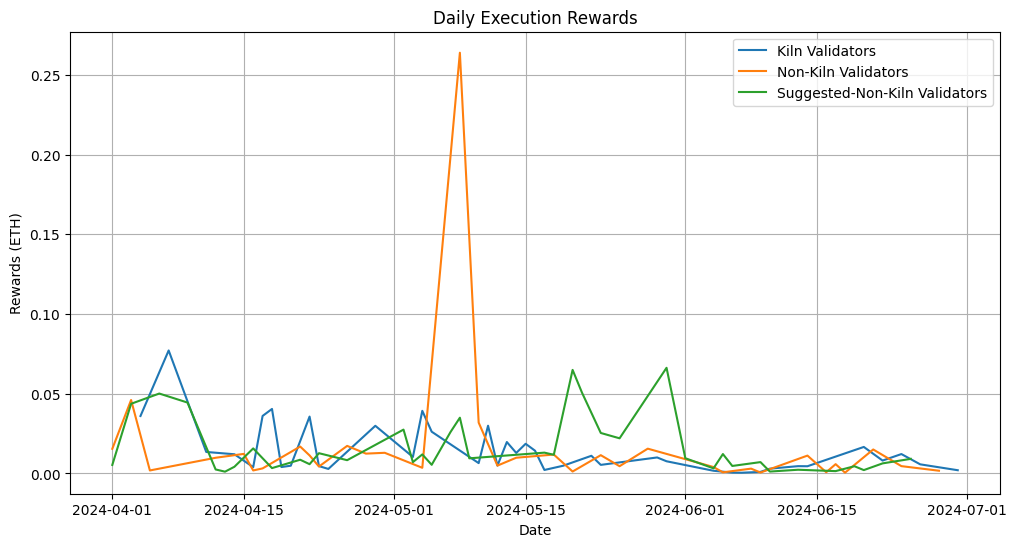

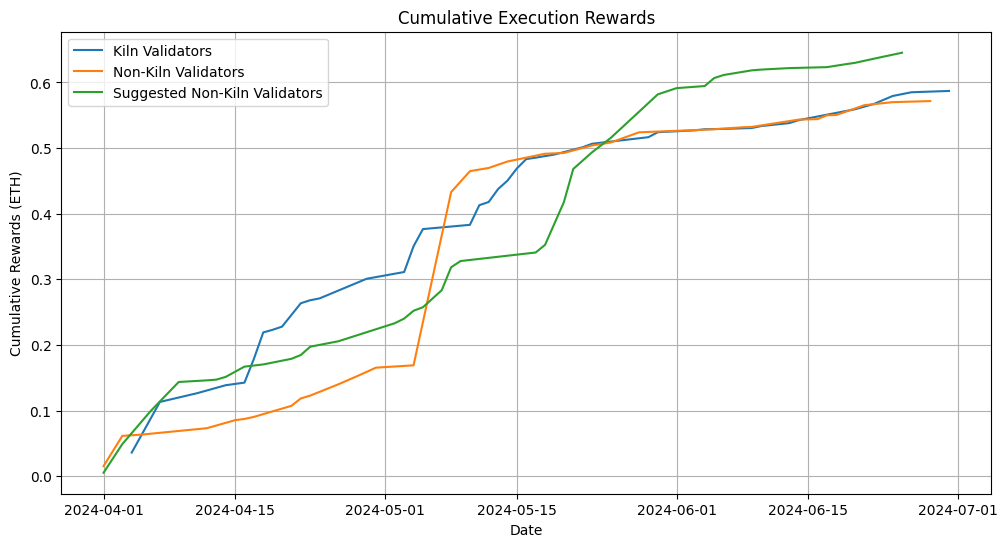

Total Kiln rewards: 0.587023 ETH
Total non-Kiln rewards: 0.571607 ETH
Total suggested non-Kiln rewards: 0.645277 ETH
Average daily Kiln rewards: 0.013977 ETH
Average daily non-Kiln rewards: 0.016812 ETH
Average daily suggested non-Kiln rewards: 0.016546 ETH


In [384]:

kiln_host = os.getenv("kiln_host")
def fetch_operations_data(validators_indexes, start_date, end_date, headers, url):
    url= kiln_host + "/v1/eth/operations"
    validators_group_string = ','.join(str(x) for x in validators_indexes)
    url = url+ f"?validator_indexes={validators_group_string}&start_date={start_date}&end_date={end_date}"
    print(url)
    response = requests.get(url, headers=headers)
    return response.json()



start_date = "2024-04-01"
end_date = "2024-06-30"


# Fetch data for Kiln and non-Kiln validators
kiln_validator_operations_data = fetch_operations_data(kiln_validator_index_list, start_date, end_date, headers=headers, url=kiln_host)
non_kiln_data_validator_operations_data = fetch_operations_data(non_kiln_validator_index_list, start_date, end_date, headers=headers, url=kiln_host)
suggested_non_kiln_validators_operations_data = fetch_operations_data(suggested_non_kiln_validator_index_list, start_date, end_date, headers=headers, url=kiln_host)

# Process data
def process_data(data):
    df = pd.DataFrame(data['data'])
    df['time'] = pd.to_datetime(df['time'])
    df['amount'] = df['amount'].astype(float) / 1e18  # Convert Wei to ETH
    return df

kiln_ops_df = process_data(kiln_validator_operations_data)
non_kiln_ops_df = process_data(non_kiln_data_validator_operations_data)
suggested_non_kiln_exec_rewards = process_data(suggested_non_kiln_validators_operations_data)

# Filter for execution rewards
kiln_exec_rewards = kiln_ops_df[kiln_ops_df['type'] == 'execution_reward']
non_kiln_exec_rewards = non_kiln_ops_df[non_kiln_ops_df['type'] == 'execution_reward']
suggested_non_kiln_exec_rewards = suggested_non_kiln_exec_rewards[suggested_non_kiln_exec_rewards['type'] == 'execution_reward']
# Check for MEV payouts
mev_payouts_kiln = kiln_exec_rewards['mev_payout_tx_hash'].notna().sum()
mev_payouts_non_kiln = non_kiln_exec_rewards['mev_payout_tx_hash'].notna().sum()
mev_payouts_suggested_non_kiln = suggested_non_kiln_exec_rewards['mev_payout_tx_hash'].notna().sum()
print(f"MEV payouts for Kiln validators: {mev_payouts_kiln}")
print(f"MEV payouts for non-Kiln validators: {mev_payouts_non_kiln}")
print(f"MEV payouts for non-Kiln validators: {mev_payouts_suggested_non_kiln}")

# Visualization 1: Daily execution rewards
plt.figure(figsize=(12, 6))
kiln_daily = kiln_exec_rewards.groupby(kiln_exec_rewards['time'].dt.date)['amount'].sum()
non_kiln_daily = non_kiln_exec_rewards.groupby(non_kiln_exec_rewards['time'].dt.date)['amount'].sum()
suggested_non_kiln_daily = suggested_non_kiln_exec_rewards.groupby(suggested_non_kiln_exec_rewards['time'].dt.date)['amount'].sum()
plt.plot(kiln_daily.index, kiln_daily.values, label='Kiln Validators')
plt.plot(non_kiln_daily.index, non_kiln_daily.values, label='Non-Kiln Validators')
plt.plot(suggested_non_kiln_daily.index, suggested_non_kiln_daily.values, label='Suggested-Non-Kiln Validators')
plt.title('Daily Execution Rewards')
plt.xlabel('Date')
plt.ylabel('Rewards (ETH)')
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Cumulative execution rewards
plt.figure(figsize=(12, 6))
plt.plot(kiln_daily.index, kiln_daily.cumsum(), label='Kiln Validators')
plt.plot(non_kiln_daily.index, non_kiln_daily.cumsum(), label='Non-Kiln Validators')
plt.plot(suggested_non_kiln_daily.index, suggested_non_kiln_daily.cumsum(), label='Suggested Non-Kiln Validators')
plt.title('Cumulative Execution Rewards')
plt.xlabel('Date')
plt.ylabel('Cumulative Rewards (ETH)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate total rewards and average daily rewards
total_kiln = kiln_daily.sum()
total_non_kiln = non_kiln_daily.sum()
total_non_kiln_suggested = suggested_non_kiln_daily.sum()

avg_daily_kiln = kiln_daily.mean()
avg_daily_non_kiln = non_kiln_daily.mean()
avg_daily_suggested_non_kiln = suggested_non_kiln_daily.mean()

print(f"Total Kiln rewards: {total_kiln:.6f} ETH")
print(f"Total non-Kiln rewards: {total_non_kiln:.6f} ETH")
print(f"Total suggested non-Kiln rewards: {total_non_kiln_suggested:.6f} ETH")
print(f"Average daily Kiln rewards: {avg_daily_kiln:.6f} ETH")
print(f"Average daily non-Kiln rewards: {avg_daily_non_kiln:.6f} ETH")
print(f"Average daily suggested non-Kiln rewards: {avg_daily_suggested_non_kiln:.6f} ETH")


Suggested Non-Kiln Validators: Show the highest cumulative rewards, peaking at over 0.6 ETH by the end of June 2024.
Kiln Validators: Demonstrate steady growth in cumulative rewards but lag behind the Suggested Non-Kiln Validators.
Non-Kiln Validators: Despite the significant daily spike, their cumulative rewards are slightly less than the Suggested Non-Kiln Validators but follow a similar growth trend.

Total Rewards:

Highest Total Rewards: Suggested Non-Kiln Validators lead with 0.645277 ETH, followed by Kiln Validators at 0.587023 ETH, and Non-Kiln Validators slightly trailing at 0.571607 ETH.
Average Daily Rewards:

Non-Kiln Validators Lead: Average daily rewards for Non-Kiln Validators (0.016812 ETH) are the highest, influenced by the significant spike in mid-May.
Close Competition: Suggested Non-Kiln Validators (0.016546 ETH) also show high average daily rewards, indicating consistent performance.
Kiln Validators: Present a lower average daily reward (0.013977 ETH), reflecting their stable but modest daily earning

Performance Variability:

Non-Kiln Validators: Variable with significant outliers. This indicates a potential for high rewards but with associated volatility and unpredictability.
Kiln Validators: More stable and consistent in daily earnings, indicating reliable performance but potentially missing high-earning opportunities.
Suggested Non-Kiln Validators: Provide a balanced performance with high cumulative rewards and average daily rewards, suggesting a mix of stability and rewarded opportunities.
Operational Stability:

Kiln Validators: Show steady, albeit lower, cumulative growth indicating a preference for reliable, consistent operations over potentially high but unpredictable rewards.
Suggested Non-Kiln Validators: Strike a balance, managing to achieve high cumulative returns while maintaining consistency, making them a potential optimal choice for risk-averse yet reward-seeking strategies.
Strategic Implications